# Window Functions 


In the previous module, you learnt how to order employees by their salary in an example data set using group by & limits. One method to do this would be to categorise them by their values. For example, you can divide them into the following categories:

Employees earning less than ₹2,50,000 per year
Employees earning greater than or equal to ₹2,50,000 per year


The first category of employees would be exempted from paying any tax and need not go through some of the additional checks that the second category of employees would be required to go through. You can solve this problem statement using a filter condition in a 'where' clause.



Now, imagine you are working in a bank and need to identify and classify your customers on the following criteria:

* Top 10% of customers: Platinum
* Next 10% of customers: Gold
* Next 20% of customer: Silver
* Rest of the customers: Regular


Your bank intends to roll out different schemes for these classes of customers in exchange for their loyalty. But how do you solve such a seemingly complex problem statement? You will find the answer to this question in the upcoming sessions.


In this session

You will be introduced to the concept of windowing functions. You will learn about the **'over'** and **'partition'** clauses used to implement windowing. After going through this session, you should be able to use window functions such as **rank()**, **dense_rank()** and **percent_rank()** in your queries.

You will also be introduced to the concept of **named windows**. You will learn about **frames** and how they move within a window. Next, you will learn about the various applications of windowing, including one to calculate an element known as a **moving average**. Finally, you will learn about the **'lead'** and **'lag'** functions that are used to fetch data from succeeding and preceding rows, respectively.

## Rank Functions 
### rank()


    Syntax 
    
    RANK() OVER (
    
    PARTITION BY [{,...}]
    
    ORDER BY  [ASC|DESC], [{,...}]
    
    )

 **Create Table** 

    -- Create the table
    CREATE TABLE sales (
        id INT PRIMARY KEY,
        employee VARCHAR(50),
        department VARCHAR(10),
        amount DECIMAL(10, 2),
        sale_date DATE
    );
    
    -- Insert the data
    INSERT INTO sales (id, employee, department, amount, sale_date) VALUES
    (1, 'Alice', 'A', 100, '2023-01-01'),
    (2, 'Bob', 'A', 200, '2023-01-02'),
    (3, 'Carol', 'B', 300, '2023-01-01'),
    (4, 'Alice', 'A', 400, '2023-01-03'),
    (5, 'Bob', 'A', 100, '2023-01-04'),
    (6, 'Carol', 'B', 500, '2023-01-02');


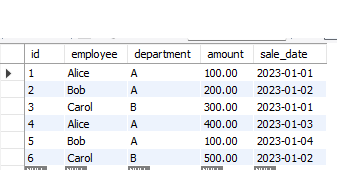



    SELECT * FROM test.sales;SELECT
      employee,
      department,
      amount,
      ROW_NUMBER() OVER(PARTITION BY department ORDER BY amount DESC) AS row_num
    FROM sales;

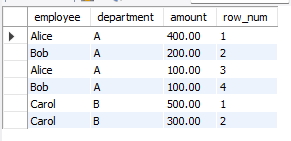


**Explanation:** Ranks each sale within each department by the highest amount.


**Example2:**

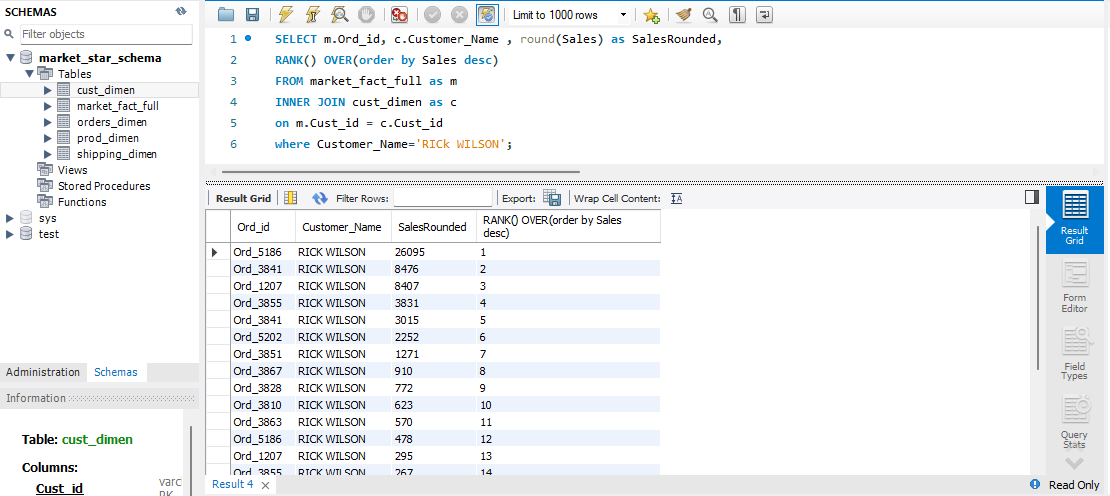

    SELECT m.Ord_id, c.Customer_Name , round(Sales) as SalesRounded, 
    RANK() OVER(order by Sales desc)
    FROM market_fact_full as m 
    INNER JOIN cust_dimen as c 
    on m.Cust_id = c.Cust_id 
    where Customer_Name='RICk WILSON';
    
### WITH clause
**Example3:** Top 10 sales order from a customer

    WITH sales_info AS (
    SELECT m.Ord_id, c.Customer_Name , 
    round(Sales) as SalesRounded, 
    RANK() OVER(order by Sales desc) as sales_rank
    FROM market_fact_full as m 
    INNER JOIN cust_dimen as c 
    on m.Cust_id = c.Cust_id 
    where Customer_Name='RICk WILSON') 
    select * 
    from sales_info 
    where sales_rank<=10;

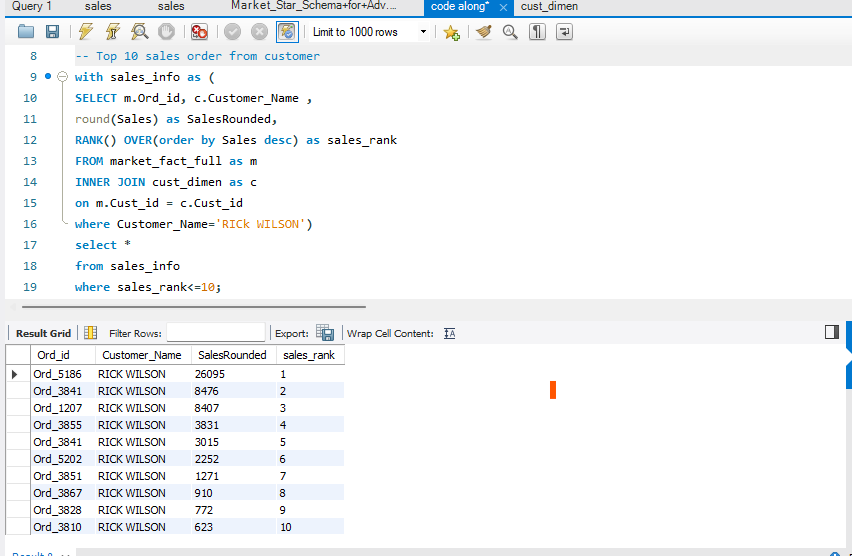

**Question :**

Given a table named products with the following columns.

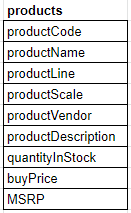


Write a query to retrieve the ranks of the products in decreasing order of their quantities in stock.


Sample Output

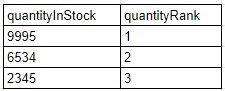

    select quantityInStock, rank() over ( order by quantityInStock desc ) as quantityRank from products ;